Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training Data:
   IMAGE MEDICINE_NAME GENERIC_NAME
0  0.png         Aceta  Paracetamol
1  1.png         Aceta  Paracetamol
2  2.png         Aceta  Paracetamol
3  3.png         Aceta  Paracetamol
4  4.png         Aceta  Paracetamol
Testing Data:
   IMAGE MEDICINE_NAME GENERIC_NAME
0  0.png         Aceta  Paracetamol
1  1.png         Aceta  Paracetamol
2  2.png         Aceta  Paracetamol
3  3.png         Aceta  Paracetamol
4  4.png         Aceta  Paracetamol
Validation Data:
   IMAGE MEDICINE_NAME GENERIC_NAME
0  0.png         Aceta  Paracetamol
1  1.png         Aceta  Paracetamol
2  2.png         Aceta  Paracetamol
3  3.png         Aceta  Paracetamol
4  4.png         Aceta  Paracetamol


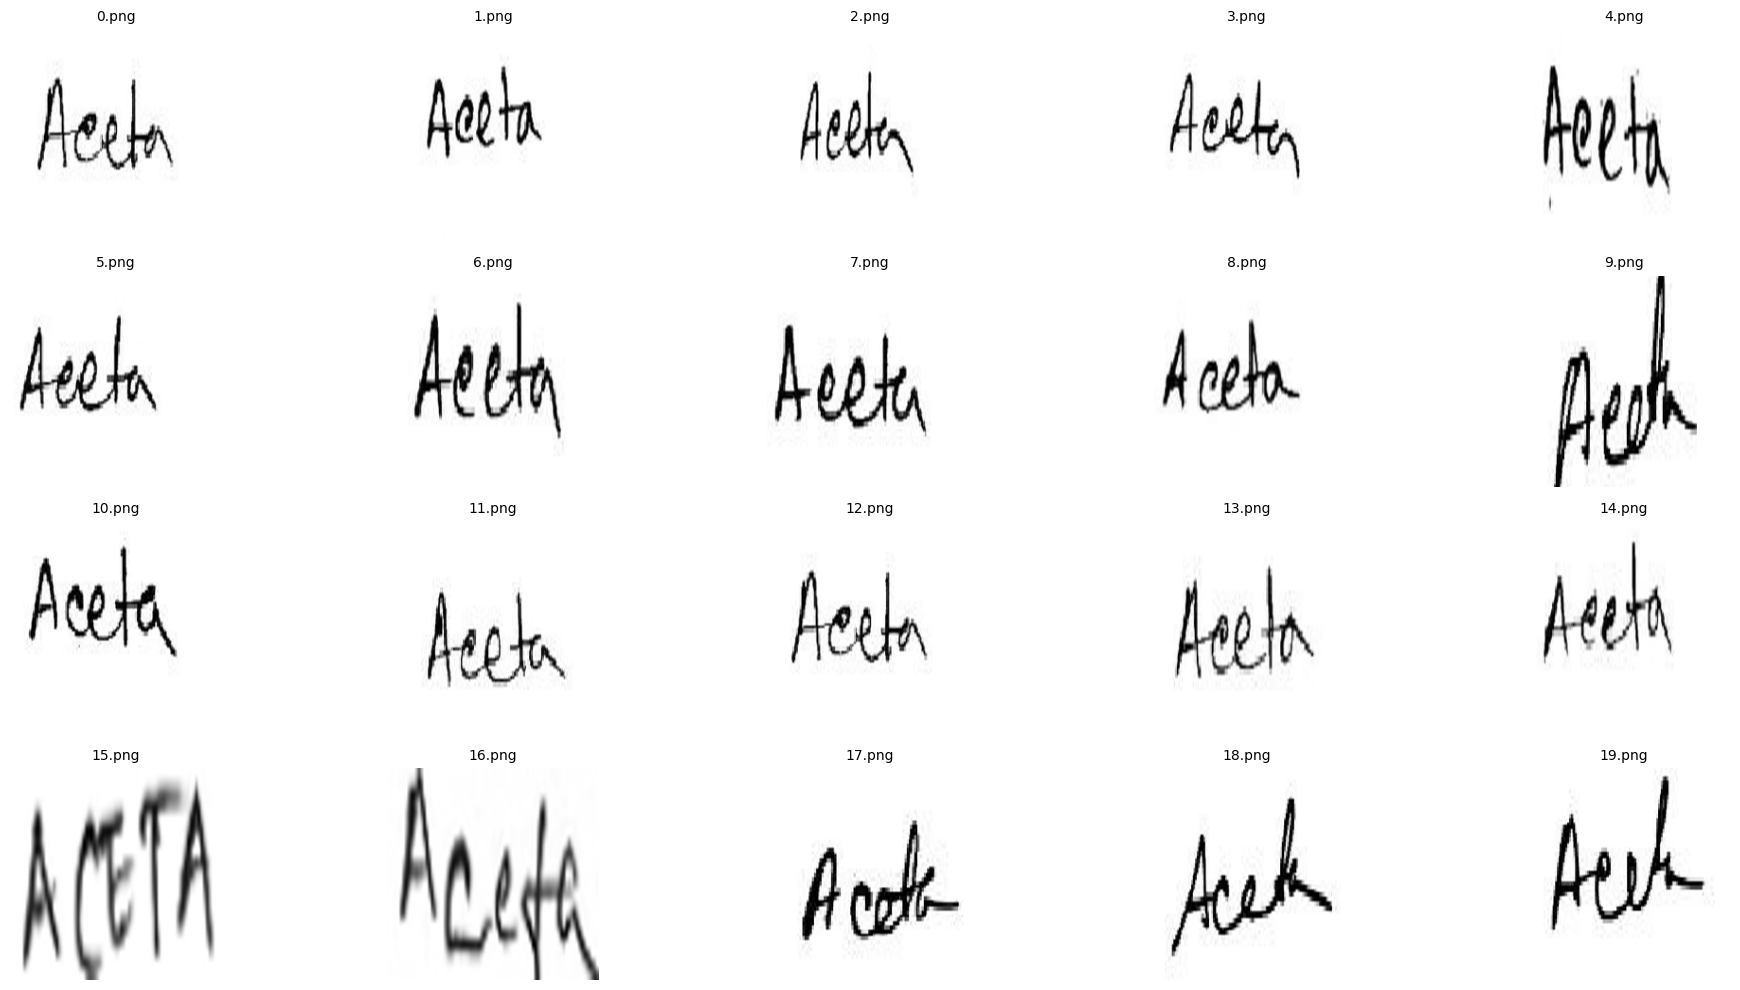

In [ ]:
#Importar archivos de google drive
from google.colab import drive

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from sklearn.preprocessing import StandardScaler


# Montar Google Drive
drive.mount('/content/drive')


# Definir las rutas de las carpetas de imágenes y los archivos CSV en Google Drive
train_dir = '/content/drive/My Drive/BD_handwrite/Training/training_words'
test_dir = '/content/drive/My Drive/BD_handwrite/Testing/testing_words'
val_dir = '/content/drive/My Drive/BD_handwrite/Validation/validation_words'
train_csv = '/content/drive/My Drive/BD_handwrite/Training/training_labels.csv'
test_csv = '/content/drive/My Drive/BD_handwrite/Testing/testing_labels.csv'
val_csv = '/content/drive/My Drive/BD_handwrite/Validation/validation_labels.csv'

# Cargar los archivos CSV
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)
val_df = pd.read_csv(val_csv)


# Rutas para guardar las imágenes normalizadas
train_normalized_dir = '/content/drive/My Drive/BD_handwrite/Training/training_words_normalized'
test_normalized_dir = '/content/drive/My Drive/BD_handwrite/Testing/testing_words_normalized'
val_normalized_dir = '/content/drive/My Drive/BD_handwrite/Validation/validation_words_normalized'
# Crear las carpetas de nuevos datos si no existen
os.makedirs(train_normalized_dir, exist_ok=True)
os.makedirs(test_normalized_dir, exist_ok=True)
os.makedirs(val_normalized_dir, exist_ok=True)


# Ver las primeras filas de cada DataFrame
print("Training Data:")
print(train_df.head())
print("Testing Data:")
print(test_df.head())
print("Validation Data:")
print(val_df.head())

#Mostrar primeras imagenes

# Función para mostrar las primeras 20 imágenes en un mosaico
def display_first_20_images(directory, df, filename_column, size=(224, 224)):
    plt.figure(figsize=(20, 10))

    for i in range(20):
        if i >= len(df):
            break

        row = df.iloc[i]
        img_path = os.path.join(directory, row[filename_column])

        try:
            with Image.open(img_path) as img:
                img = img.convert('RGB')
                img = img.resize(size)
                plt.subplot(4, 5, i+1)
                plt.imshow(img)
                plt.title(row[filename_column], fontsize=10)
                plt.axis('off')
        except Exception as e:
            print(f"Error al cargar la imagen {img_path}: {e}")

    plt.tight_layout()
    plt.show()

# Mostrar las primeras 20 imágenes del conjunto de entrenamiento
display_first_20_images(train_dir, train_df, "IMAGE")


Número de imágenes en Training: 3120
Número de imágenes en Testing: 790
Número de imágenes en Validation: 780


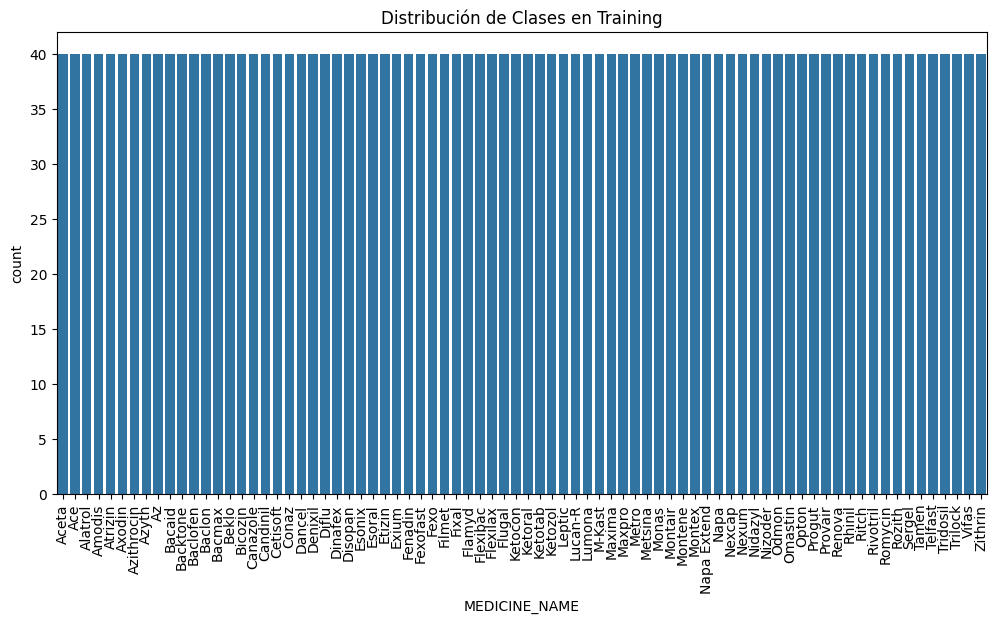

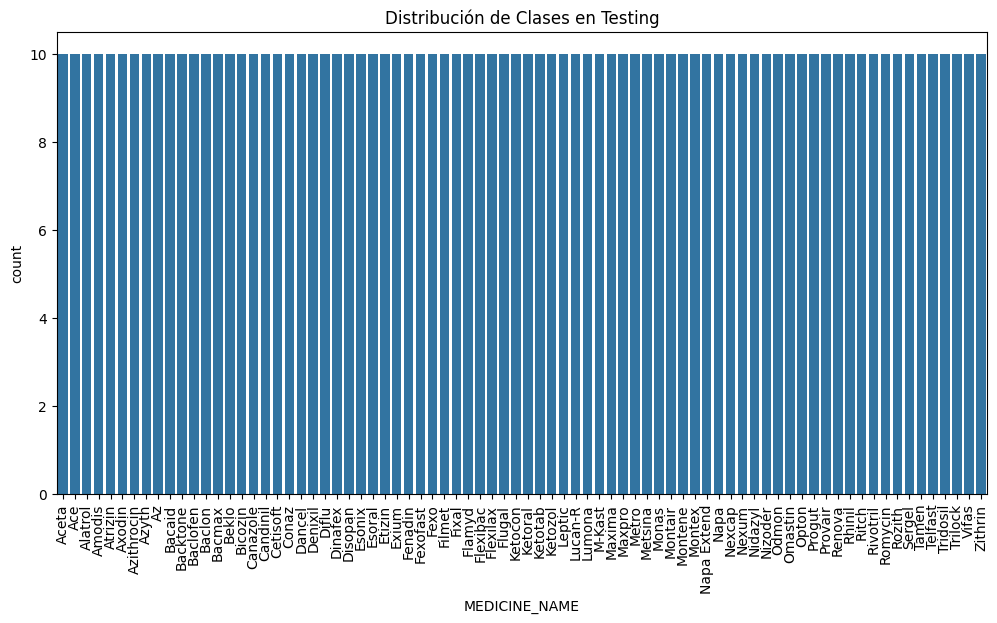

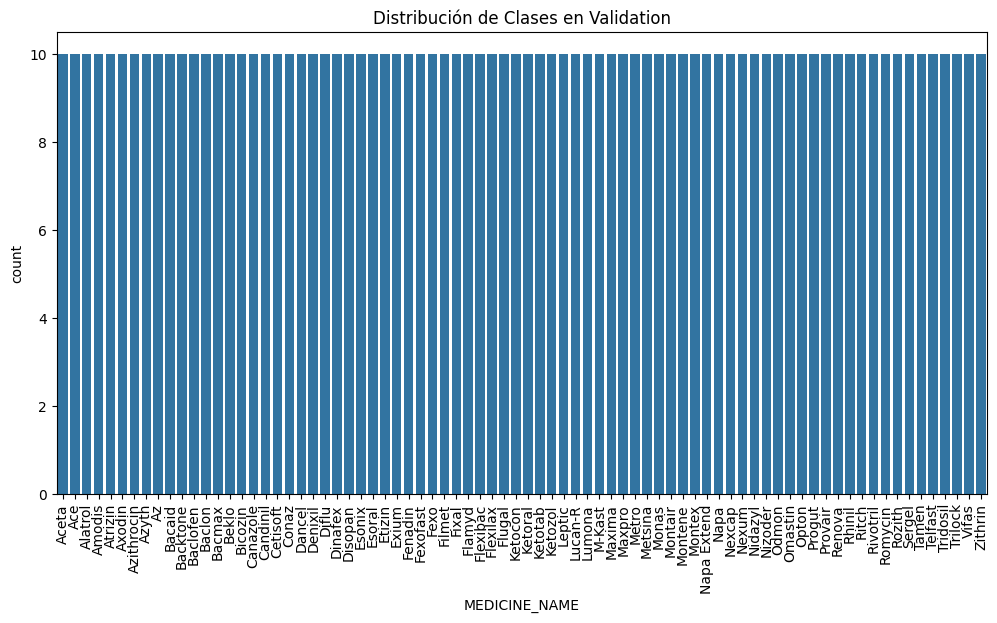

In [ ]:
# Función para contar imágenes en cada carpeta
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

# Contar imágenes en cada conjunto
train_count = count_images(train_dir)
test_count = count_images(test_dir)
val_count = count_images(val_dir)

print(f'Número de imágenes en Training: {train_count}')
print(f'Número de imágenes en Testing: {test_count}')
print(f'Número de imágenes en Validation: {val_count}')

# Análisis de la distribución de clases para cada conjunto
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='MEDICINE_NAME')
plt.title('Distribución de Clases en Training')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=test_df, x='MEDICINE_NAME')
plt.title('Distribución de Clases en Testing')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=val_df, x='MEDICINE_NAME')
plt.title('Distribución de Clases en Validation')
plt.xticks(rotation=90)
plt.show()

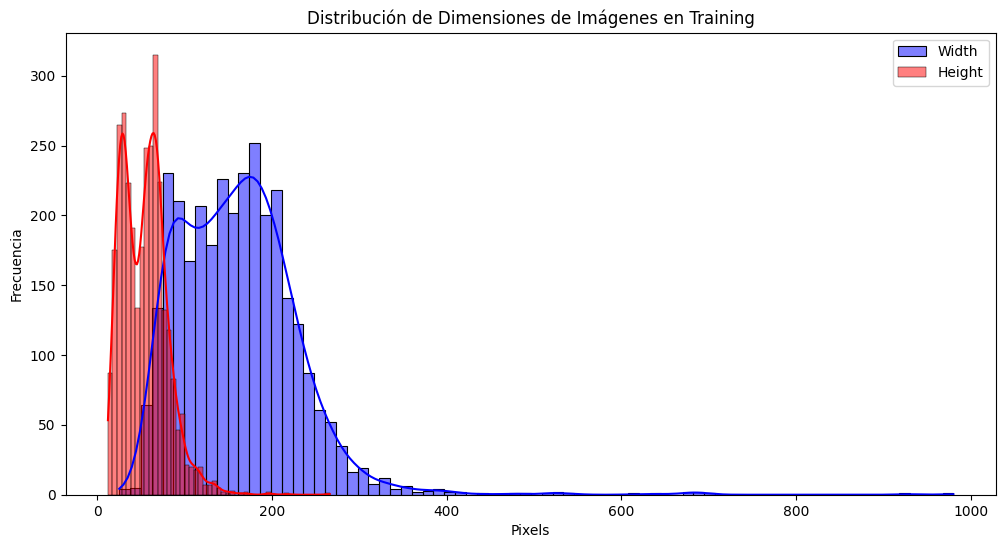

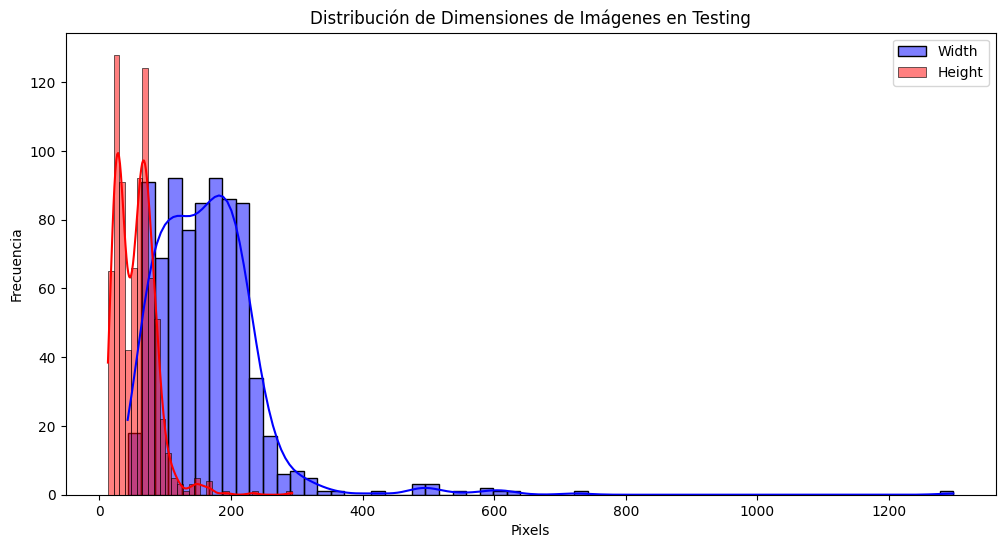

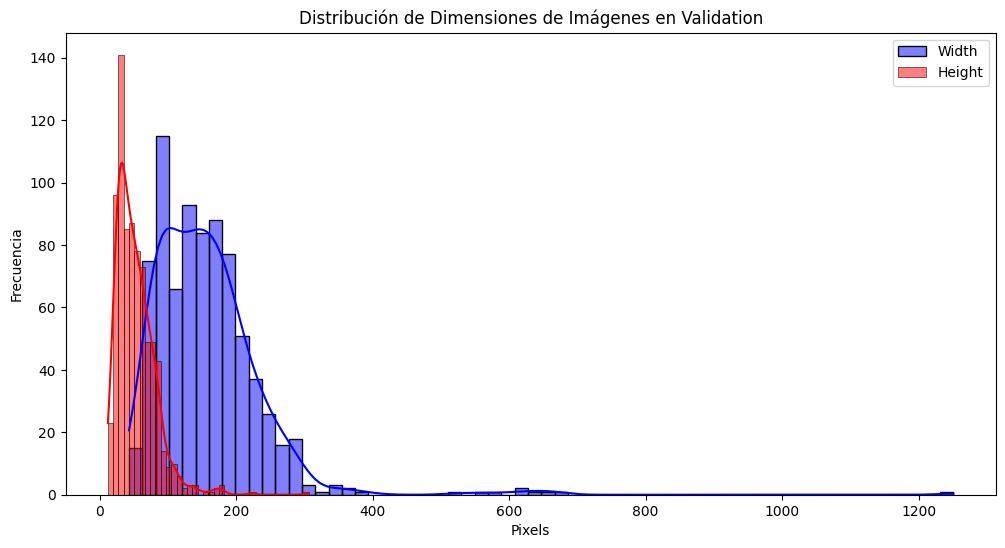

In [ ]:

# Función para obtener dimensiones de las imágenes
def get_image_dimensions(directory, df):
    dimensions = []
    for idx, row in df.iterrows():
        img_path = os.path.join(directory, row['IMAGE'])
        try:
            with Image.open(img_path) as img:
                dimensions.append(img.size)
        except:
            pass
    return dimensions

# Obtener dimensiones de las imágenes en cada conjunto
train_dimensions = get_image_dimensions(train_dir, train_df)
test_dimensions = get_image_dimensions(test_dir, test_df)
val_dimensions = get_image_dimensions(val_dir, val_df)

# Convertir las dimensiones a un DataFrame
train_dim_df = pd.DataFrame(train_dimensions, columns=['Width', 'Height'])
test_dim_df = pd.DataFrame(test_dimensions, columns=['Width', 'Height'])
val_dim_df = pd.DataFrame(val_dimensions, columns=['Width', 'Height'])

# Análisis de dimensiones de las imágenes para el conjunto de entrenamiento
plt.figure(figsize=(12, 6))
sns.histplot(train_dim_df['Width'], kde=True, label='Width', color='blue')
sns.histplot(train_dim_df['Height'], kde=True, label='Height', color='red')
plt.title('Distribución de Dimensiones de Imágenes en Training')
plt.xlabel('Pixels')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Análisis de dimensiones de las imágenes para el conjunto de prueba
plt.figure(figsize=(12, 6))
sns.histplot(test_dim_df['Width'], kde=True, label='Width', color='blue')
sns.histplot(test_dim_df['Height'], kde=True, label='Height', color='red')
plt.title('Distribución de Dimensiones de Imágenes en Testing')
plt.xlabel('Pixels')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Análisis de dimensiones de las imágenes para el conjunto de validación
plt.figure(figsize=(12, 6))
sns.histplot(val_dim_df['Width'], kde=True, label='Width', color='blue')
sns.histplot(val_dim_df['Height'], kde=True, label='Height', color='red')
plt.title('Distribución de Dimensiones de Imágenes en Validation')
plt.xlabel('Pixels')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


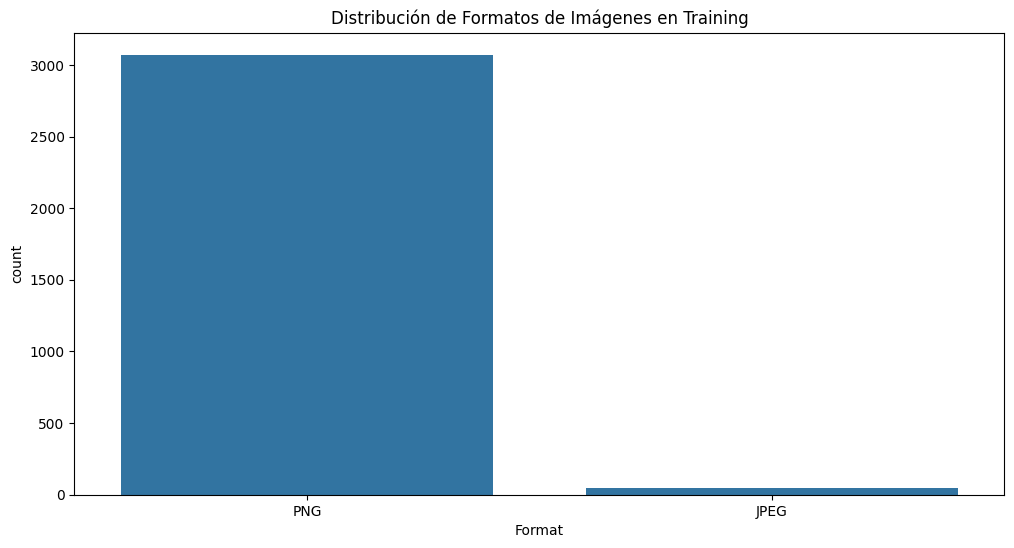

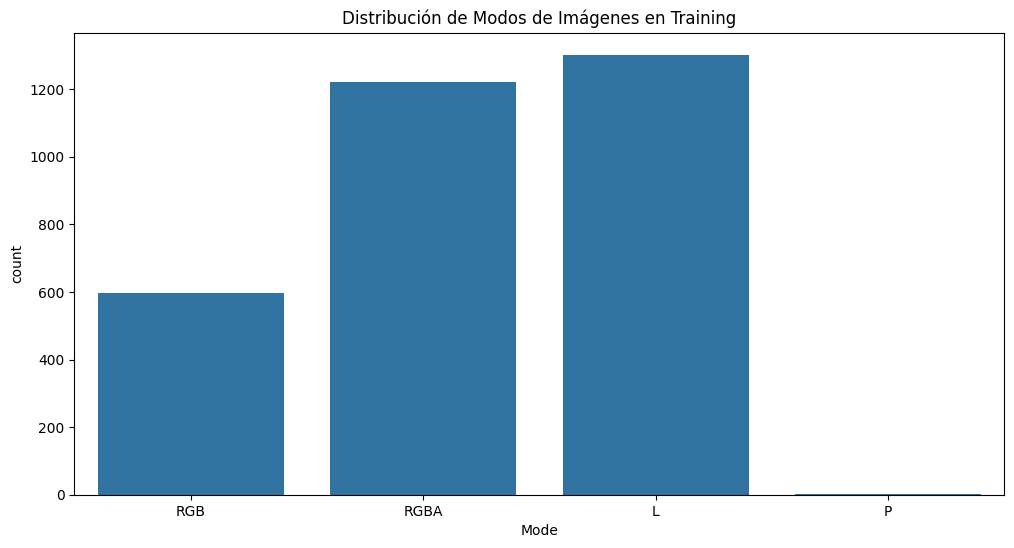

In [ ]:

# Análisis de formato y canales de color
def analyze_image_formats(directory, df):
    formats = []
    modes = []
    for idx, row in df.iterrows():
        img_path = os.path.join(directory, row['IMAGE'])
        try:
            with Image.open(img_path) as img:
                formats.append(img.format)
                modes.append(img.mode)
        except:
            pass
    return formats, modes

train_formats, train_modes = analyze_image_formats(train_dir, train_df)

# Análisis de formatos
formats_df = pd.DataFrame(train_formats, columns=['Format'])
plt.figure(figsize=(12, 6))
sns.countplot(data=formats_df, x='Format')
plt.title('Distribución de Formatos de Imágenes en Training')
plt.show()

# Análisis de canales de color
modes_df = pd.DataFrame(train_modes, columns=['Mode'])
plt.figure(figsize=(12, 6))
sns.countplot(data=modes_df, x='Mode')
plt.title('Distribución de Modos de Imágenes en Training')
plt.show()



In [ ]:
#Normalizar
# Función para cargar imágenes, redimensionarlas y convertirlas a arrays
def load_images(directory, df, filename_column, size=(224, 224)):
    images = []
    for idx, row in df.iterrows():
        img_path = os.path.join(directory, row["IMAGE"])
        try:
            with Image.open(img_path) as img:
                img = img.convert('RGB')
                img = img.resize(size)
                images.append(np.array(img))
        except Exception as e:
            print(f"Error al cargar la imagen {img_path}: {e}")
    return np.array(images)

# Cargar las imágenes del conjunto de entrenamiento
train_images = load_images(train_dir, train_df, "IMAGE")

# Calcular la media y desviación estándar de las imágenes de entrenamiento
scaler = StandardScaler()
scaler.fit(train_images.reshape(-1, train_images.shape[-1]))

# Función para normalizar y guardar imágenes
def normalize_and_save_images(directory, df, save_directory, scaler, filename_column, size=(224, 224)):
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)
    for idx, row in df.iterrows():
        img_path = os.path.join(directory, row["IMAGE"])
        try:
            with Image.open(img_path) as img:
                img = img.convert('RGB')
                img = img.resize(size)
                img_array = np.array(img)
                img_array = scaler.transform(img_array.reshape(-1, img_array.shape[-1])).reshape(img_array.shape)
                img_array = (img_array * 255).astype(np.uint8)  # Rescale to [0, 255]
                normalized_img = Image.fromarray(img_array)
                normalized_img.save(os.path.join(save_directory, row["IMAGE"]))
        except Exception as e:
            print(f"Error al procesar la imagen {img_path}: {e}")

# Normalizar y guardar las imágenes en nuevas carpetas
normalize_and_save_images(train_dir, train_df, train_normalized_dir, scaler, "IMAGE")
normalize_and_save_images(test_dir, test_df, test_normalized_dir, scaler, "IMAGE")
normalize_and_save_images(val_dir, val_df, val_normalized_dir, scaler, "IMAGE")

print("Imágenes normalizadas y guardadas correctamente.")

Imágenes normalizadas y guardadas correctamente.


In [ ]:
# Importar las librerias necesarias para el modelo
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
from tqdm.notebook import trange, tqdm
import tensorflow as tf

import copy
import random
import time

In [ ]:
# Seteamos una semilla aleatoria para poder tener resultados reproducibles
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
# Funcion para convertir las imagenes a escala de grises y normalizar las imagenes entre 0 y 1
def normalizar(folder_path):

  #Leer las imagenes y convertirlas en matrices numpy
  images = []
  for filename in os.listdir(folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
      image_path = os.path.join(folder_path, filename)
      image = Image.open(image_path)
      image = image.convert('L')
      image_np = np.array(image, dtype=np.float32) / 255.0
      images.append(image_np)

  if not images:
    raise ValueError("No se encontraron imagenes en la carpeta especificada.")

  image_shape = images[0].shape
  for i in range(1, len(images)):
    if images[i].shape != image_shape:
      raise ValueError('Todas las imágenes deben tener las mismas dimensiones')

  images_np = np.array(images)

  return images_np

train_data = normalizar(train_normalized_dir)
test_data = normalizar(test_normalized_dir)
validation_data = normalizar(val_normalized_dir)

In [ ]:
#definimos un dataloader para ir pasando por bloques las imagenes al modelo
BATCH_SIZE = 64

train_iterator = data.DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(validation_data, batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data, batch_size=BATCH_SIZE)